In [33]:
#DS Basics
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt

In [34]:
#SKLearn Stuff
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [35]:
#helpers
%matplotlib inline

In [36]:
data=pd.read_csv('Demographic_Data_Clean.csv')

In [37]:
data.head(0)

,in-store,age,items,amount,region,trantype,regionname,agerange


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79979 entries, 0 to 79978
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   in-store    79979 non-null  int64  
 1   age         79979 non-null  int64  
 2   items       79979 non-null  int64  
 3   amount      79979 non-null  float64
 4   region      79979 non-null  int64  
 5   trantype    79979 non-null  object 
 6   regionname  79979 non-null  object 
 7   agerange    79979 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 4.9+ MB


In [39]:
data[0:3] # Select rows 0, 1, 2 (row 3 is not selected)

,in-store,age,items,amount,region,trantype,regionname,agerange
0,0,37,4,281.03,2,online,South,30-39
1,0,35,2,219.51,2,online,South,30-39
2,1,45,3,1525.70,4,in-store,West,40-49


In [40]:
#features
X = data.iloc[:,0:4]
print('Summary of feature sample')
X.head()

Summary of feature sample


,in-store,age,items,amount
0,0,37,4,281.03
1,0,35,2,219.51
2,1,45,3,1525.70
3,1,46,3,715.25
4,1,33,4,1937.50


In [41]:
#dependent variable
y = data['region']

In [42]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [56]:
#Modeling (Classification)
algo = GradientBoostingClassifier(learning_rate=0.1)
model = algo.fit(X_train,y_train)

In [57]:
algo.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [58]:
#Predictions
preds = model.predict(X_test)

In [59]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       0.40      0.52      0.45      4838
           2       0.90      1.00      0.95      5979
           3       0.52      0.23      0.32      5391
           4       0.65      0.73      0.69      7786

    accuracy                           0.64     23994
   macro avg       0.62      0.62      0.60     23994
weighted avg       0.63      0.64      0.62     23994



In [60]:
from sklearn.tree import plot_tree

In [61]:
len(model.estimators_)

100

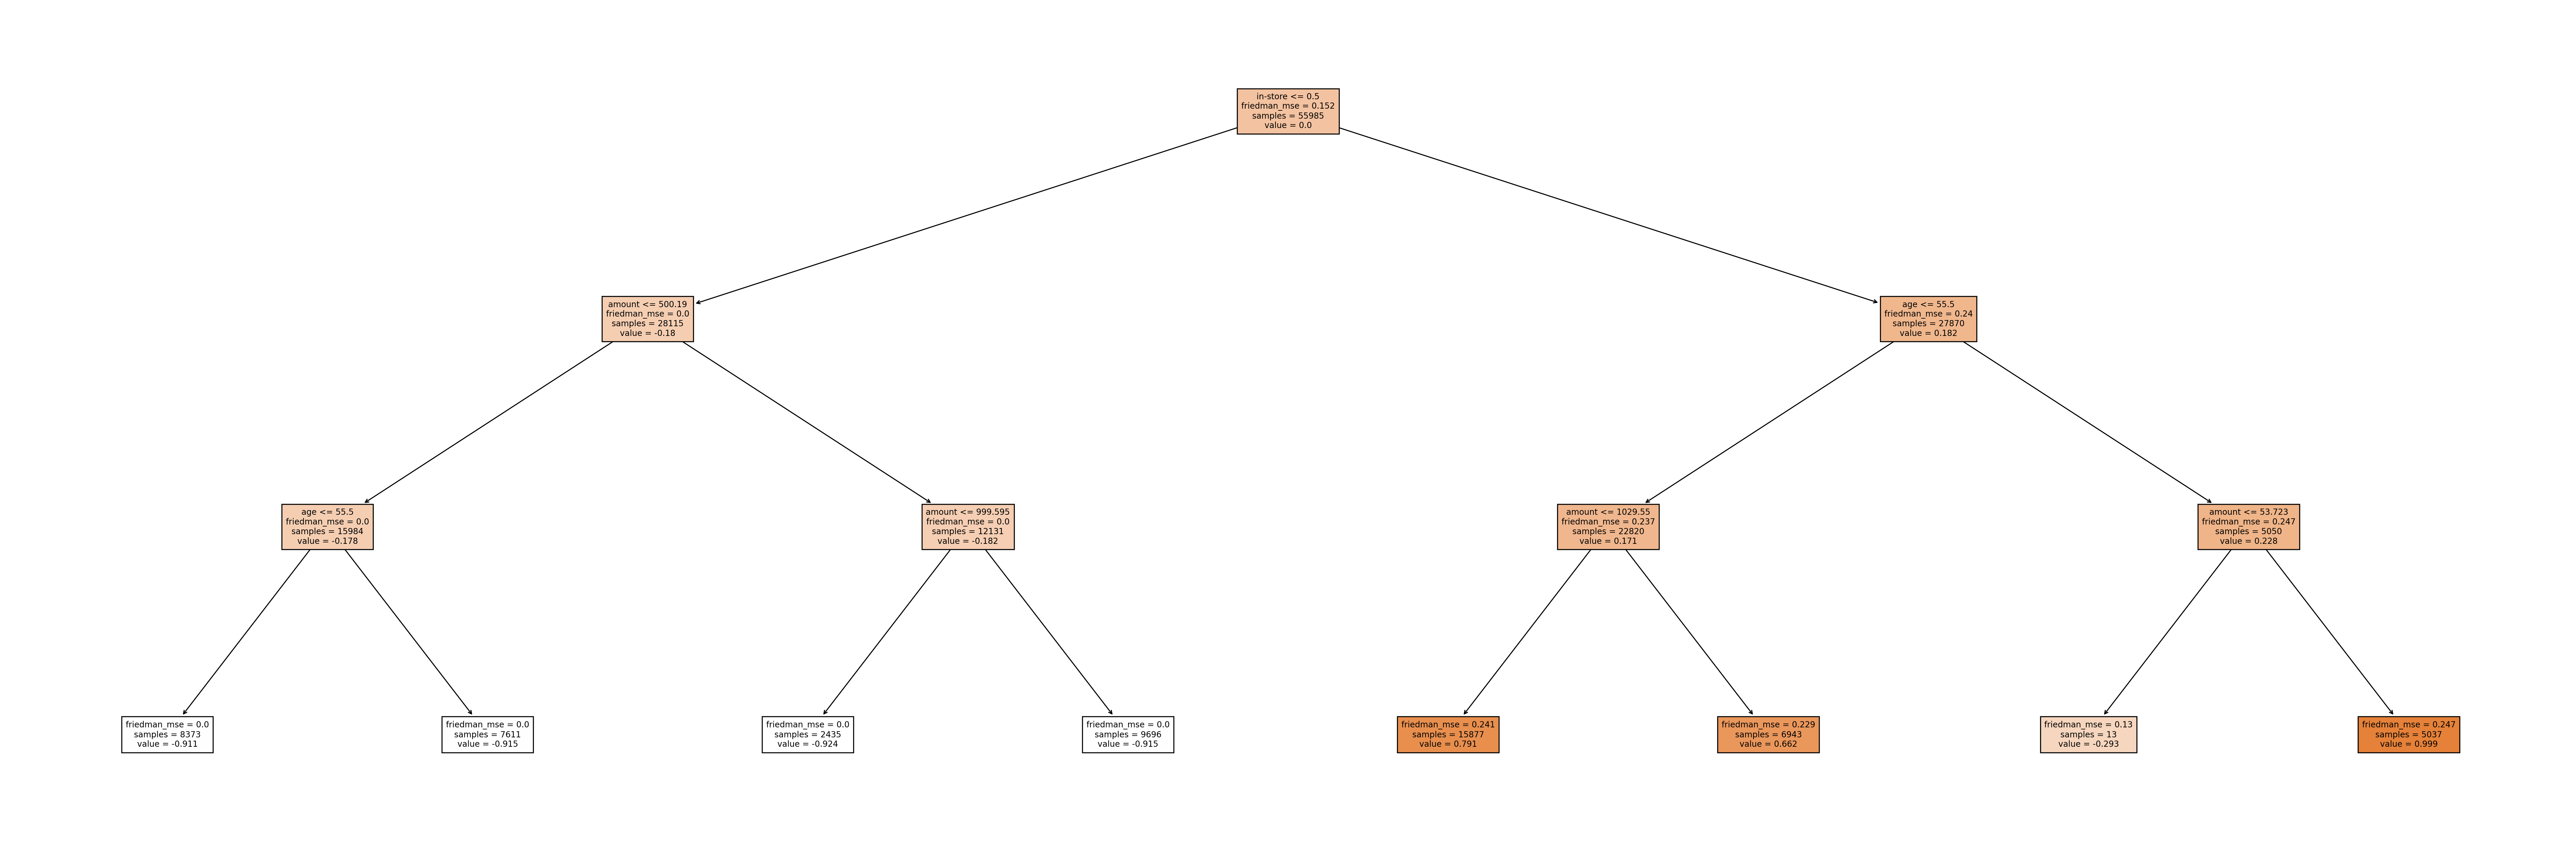

In [65]:
fig = plt.figure(figsize=(45,15),dpi=250)
tree = plot_tree(model.estimators_[1,0], fontsize=8, feature_names=X.columns, max_depth = 3, class_names=['North','South','East','West'], filled=True)